In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as const
import scienceplots
plt.style.use(['science','grid','bright'])

In [2]:
G = const.G
pi = np.pi
pi4 = 4 * pi

In [3]:
def bondi_accretion(M_NS, a_orb, e, v_wind, c_s, M_2, M_2_dot, age):
    
    M_tot = M_NS + M_2
    
    v_orb = np.sqrt(G * M_tot / (a_orb * (1 - e)))
    v_rel_min = v_wind - v_orb
    v_rel_max = v_wind + v_orb
    
    r_bondi_min = 2 * G * M_NS / (v_rel_max**2 + c_s**2)
    r_bondi_max = 2 * G * M_NS / (v_rel_min**2 + c_s**2)
    
    rho_v_rel = M_2_dot / (pi4 * (a_orb * (1 - e))**2)
    
    M_NS_dot_min = pi * r_bondi_min**2 * rho_v_rel
    M_NS_dot_max = pi * r_bondi_max**2 * rho_v_rel
    
    delta_M_NS_min = M_NS_dot_min * age
    delta_M_NS_max = M_NS_dot_max * age
    
    return delta_M_NS_min.to(u.M_sun), delta_M_NS_max.to(u.M_sun)

In [4]:
M_NS = 2.5 * u.M_sun
a_orb = 38 * u.R_sun
e = 0.2
v_wind = 1000 * u.km / (u.s)
c_s = 0
M_2 = 60 * u.M_sun
M_2_dot = 2.1e-6 * u.M_sun/(u.yr)
age = 2.2e6 * u.yr

bondi_accretion(M_NS, a_orb, e, v_wind, c_s, M_2, M_2_dot, age)

(<Quantity 0.00016256 solMass>, <Quantity 0.05826815 solMass>)

In [5]:
def a_SN_Jeans_Mode(a, M_X, M_2, M_2_0):
    M_0 = M_X + M_2_0
    M = M_X + M_2
    return (a * (M/M_0)).to(u.R_sun)

In [6]:
def rL(q):
    return (0.49 * q**(2/3)) / (0.6*q**(2/3) + np.log(1 + q**(1/3)))

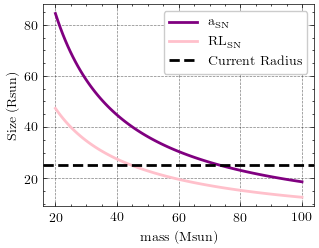

In [7]:
a = 38 * (1-0.2) * u.R_sun
M_X = 2.5 * u.M_sun
M_2 = 60 * u.M_sun
M_2_0 = np.linspace(20,100,100) * u.M_sun

a_0 = a_SN_Jeans_Mode(a, M_X, M_2, M_2_0)
R_L_0 = rL(M_2_0/M_X) * a_0

plt.plot(M_2_0, a_0, color = 'purple', lw = 2, label = r'$\text{a}_{\text{SN}}$')
plt.plot(M_2_0, R_L_0, color = 'pink', lw = 2, label = r'$\text{RL}_{\text{SN}}$')
plt.axhline(25, color = 'k', ls = '--', lw = 2, label = 'Current Radius')
plt.xlabel('mass (Msun)')
plt.ylabel('Size (Rsun)')
plt.legend()

In [60]:
#single star tracks
tracks = []
mass_grid = [20,30,40,50,61,71,81,91]
cols_to_use = ['star_age','star_mass','log_R', 'center_h1']

for m in mass_grid:
    path = f'/groups/mrenzo/Neev/Projects/XRB/SSE_grid/mass_{m}/LOGS1/history.data'
    data = pd.read_table(path, skiprows = 5, sep = '\s+', usecols = cols_to_use)[cols_to_use]
    tracks.append(data.values)
    

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_24051/3569720948.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_table(path, skiprows = 5, sep = '\s+', usecols = cols_to_use)[cols_to_use]


19.867214454888604 29.39629868188862
29.356560097059894 56.10876379424248
38.324004804110096 142.03292360528184
46.797963704408495 569.4184821370269
55.585133154144245 891.9155565185032
63.11945737536599 1211.6751137570739
Mass of 81 did not reach TAMS
Mass of 91 did not reach TAMS


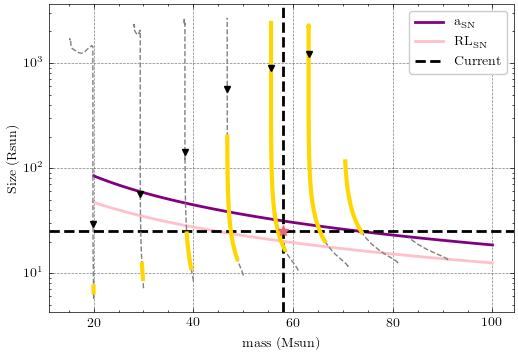

In [76]:
plt.figure(figsize = (6,4))

plt.plot(M_2_0, a_0, color = 'purple', lw = 2, label = r'$\text{a}_{\text{SN}}$')
plt.plot(M_2_0, R_L_0, color = 'pink', lw = 2, label = r'$\text{RL}_{\text{SN}}$')
plt.axhline(25, color = 'k', ls = '--', lw = 2, label = 'Current')
plt.axvline(58, color = 'k', ls = '--', lw = 2)

for i,m in enumerate(mass_grid):
    age_evol = tracks[i][:,0]
    mass_evol = tracks[i][:,1]
    radius_evol = 10**tracks[i][:,2]
    center_h1_evol = tracks[i][:,3]
    plt.plot(mass_evol, radius_evol, color = 'gray', ls = '--')
    SN_time = (2e6 < age_evol) & (age_evol < 4e6)
    plt.plot(mass_evol[SN_time], radius_evol[SN_time], color = 'gold', lw = 3)
    try:
        mass_TAMS = mass_evol[np.where(center_h1_evol <= 1e-2)[0][0]]
        radius_TAMS = radius_evol[np.where(center_h1_evol <= 1e-2)[0][0]]
        print(mass_TAMS,radius_TAMS)
        plt.plot(mass_TAMS,radius_TAMS, marker='v', color='k', markersize=4)

    except:
        print(f'Mass of {m} did not reach TAMS')

plt.plot(58, 25, marker='*', color='C1', markersize=8)
plt.yscale('log')
plt.xlabel('mass (Msun)')
plt.ylabel('Size (Rsun)')
plt.legend(loc = 'upper right')